In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from wrangle import *
from env import *

# 1. Using this lesson as a guide, perform clustering on the iris dataset.

# a. Choose features other than the ones used in the lesson.

### 1. Clustering with the Iris Dataset

In [69]:
iris = sns.load_dataset('iris')

### 2. Feature Select

In [70]:
X = iris[['petal_width', 'sepal_width']]

In [72]:
mm_scaler = MinMaxScaler()

X[['petal_width', 'sepal_width']] = mm_scaler.fit_transform(X[['petal_width', 'sepal_width']])

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_31777/2332996752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['petal_width', 'sepal_width']] = mm_scaler.fit_transform(X[['petal_width', 'sepal_width']])


In [73]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [74]:
iris['cluster'] = kmeans.predict(X)

# b. Visualize the results of your clustering.

### 3. Visualize Clusters

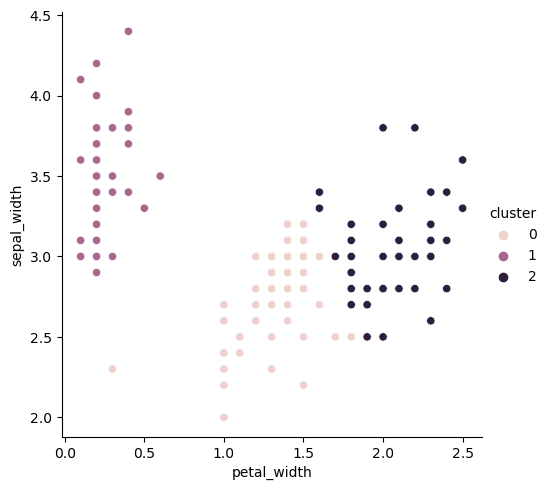

In [75]:
sns.relplot(data=iris,x='petal_width',y='sepal_width',hue='cluster')

### 4. Cluster Centers

In [116]:
kmeans.cluster_centers_

array([[0.52767355, 0.1483325 ],
       [0.23347356, 0.80771684],
       [0.11791498, 0.41675618],
       [0.9029304 , 0.48104956],
       [0.56036325, 0.46371882]])

In [117]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,spending_score
0,0.527674,0.148333
1,0.233474,0.807717
2,0.117915,0.416756
3,0.902930,0.481050
4,0.560363,0.463719


/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


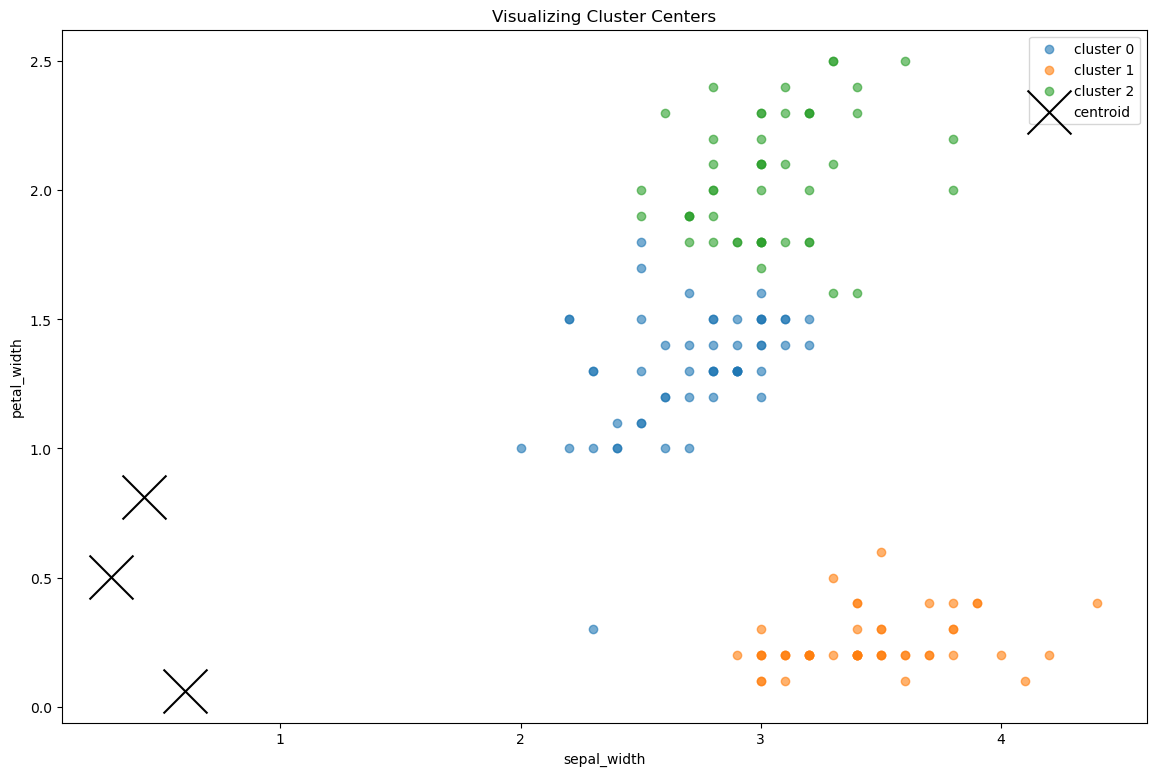

In [78]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset['sepal_width'], subset['petal_width'], label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')
plt.show()

### Cluster Count = 5

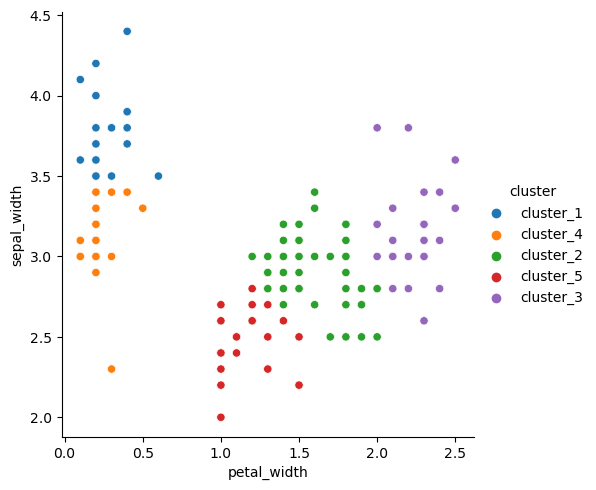

In [79]:
kmeans = KMeans(n_clusters=5).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris,x='petal_width',y='sepal_width',hue='cluster')

# c. Use the elbow method to visually select a good value for k.

### Elbow

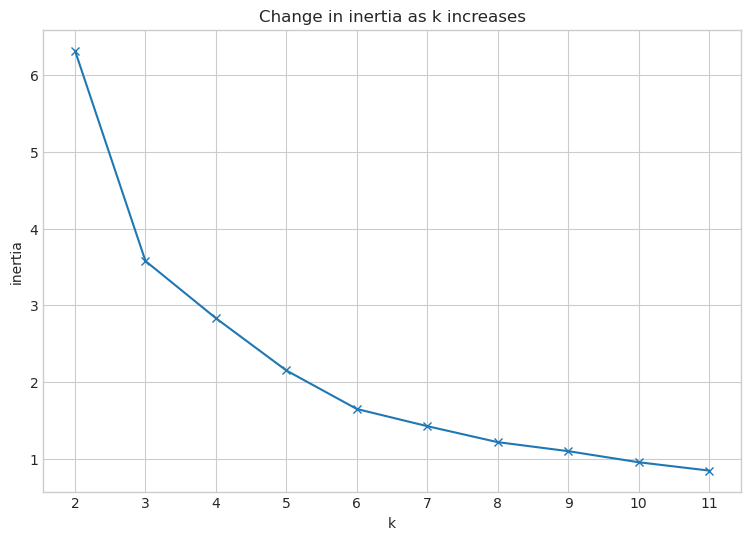

In [80]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Loop Cluster Count

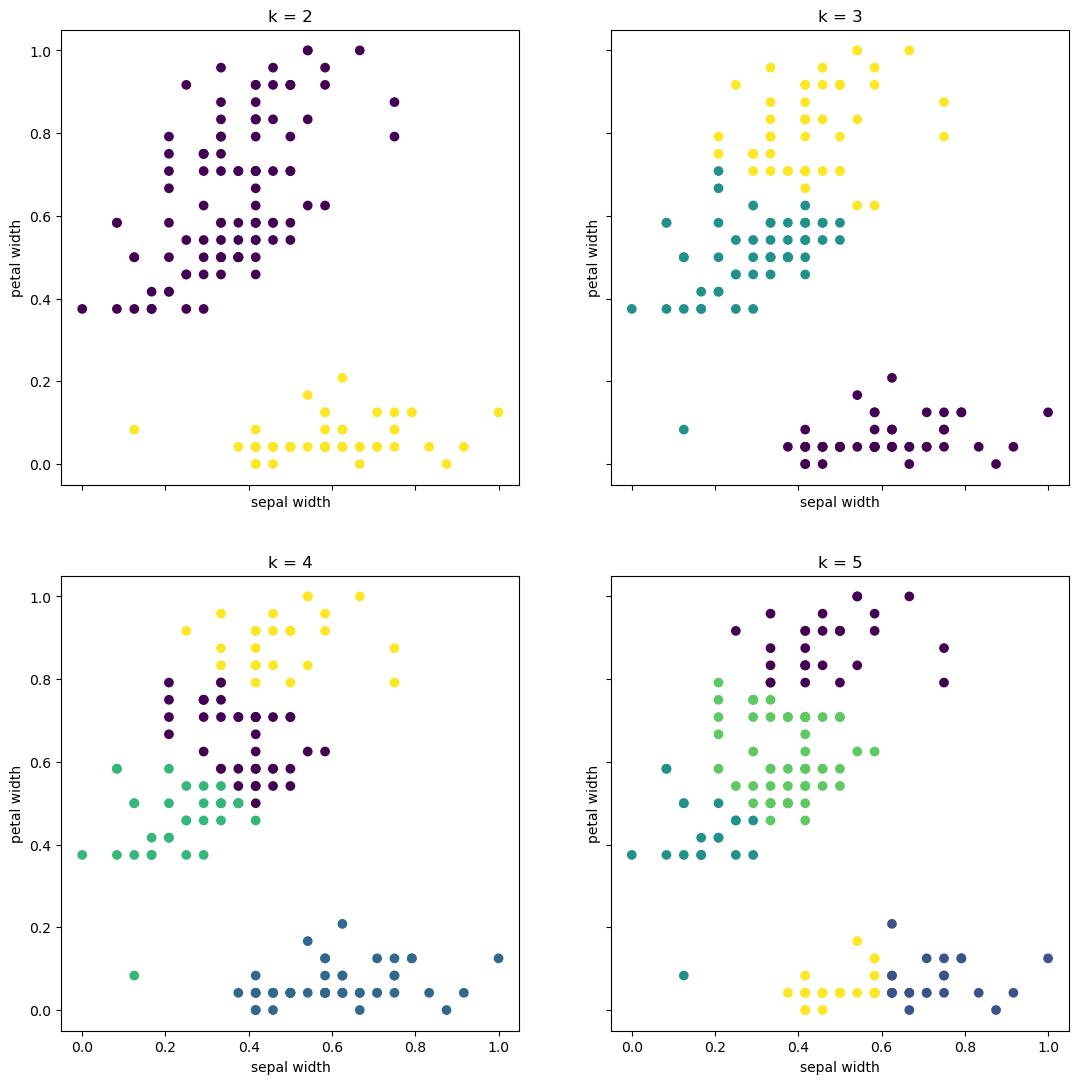

In [82]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X['sepal_width'], X['petal_width'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

# d. Repeat the clustering, this time with 3 different features.

### Clustering with the Iris Dataset

In [28]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster'],
      dtype='object')

In [85]:
X = iris[['petal_width', 'sepal_width','sepal_length']]

In [86]:
mm_scaler = MinMaxScaler()

X[['petal_width', 'sepal_width','sepal_length']] = mm_scaler.fit_transform(X[['petal_width', 'sepal_width','sepal_length']])

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_31777/2629990573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['petal_width', 'sepal_width','sepal_length']] = mm_scaler.fit_transform(X[['petal_width', 'sepal_width','sepal_length']])


In [87]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [88]:
iris['3_features_cluster'] = kmeans.predict(X)

### Visualize Clusters

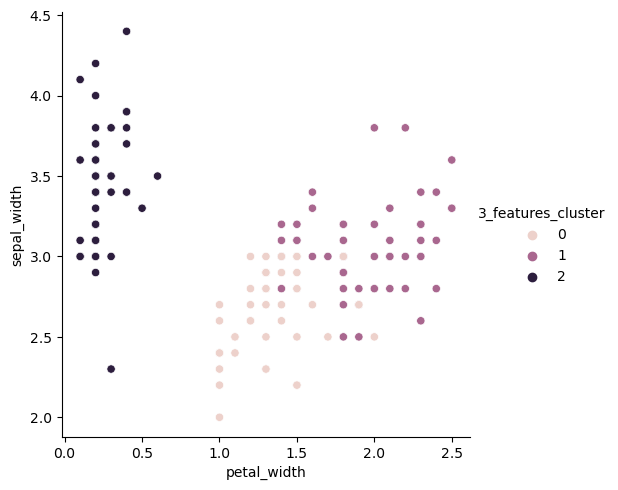

In [89]:
sns.relplot(data=iris,x='petal_width',y='sepal_width',hue='3_features_cluster')

### Cluster Centers

In [90]:
kmeans.cluster_centers_

array([[0.52430556, 0.27690972, 0.40798611],
       [0.77884615, 0.44310897, 0.67147436],
       [0.06083333, 0.595     , 0.19611111]])

In [91]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


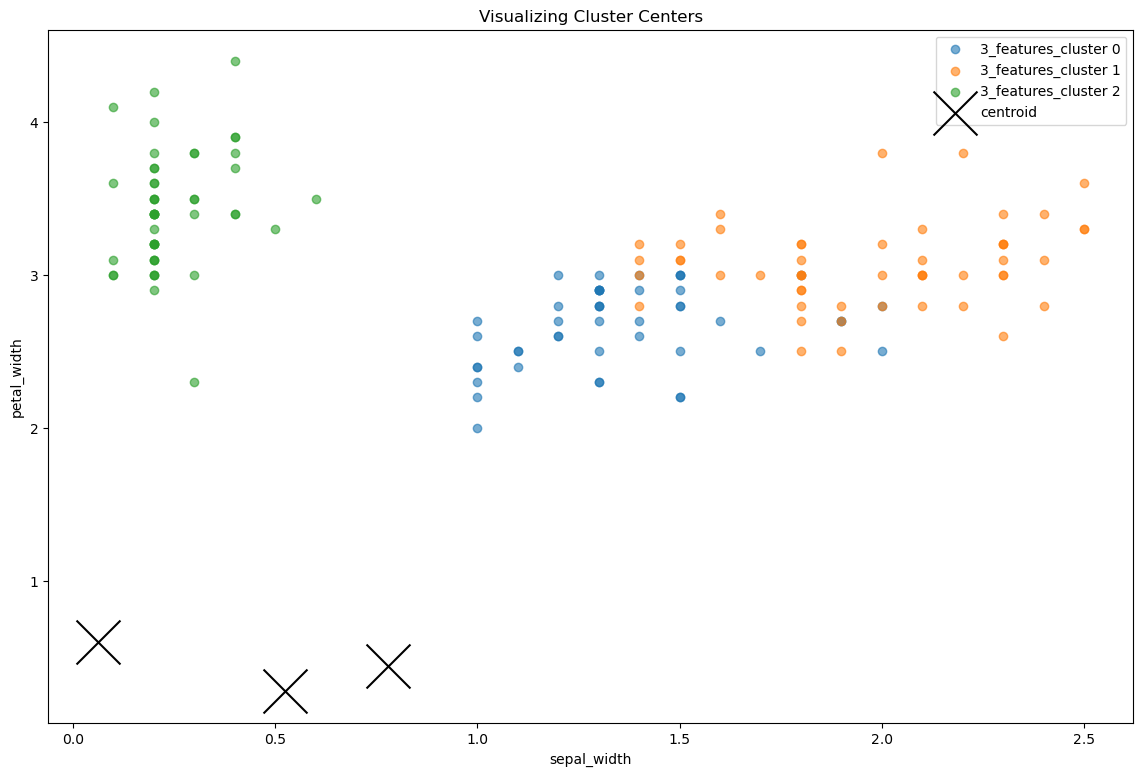

In [92]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('3_features_cluster'):
    plt.scatter(subset['petal_width'], subset['sepal_width'], label='3_features_cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='sepal_width', x='petal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')
plt.show()

### Elbow

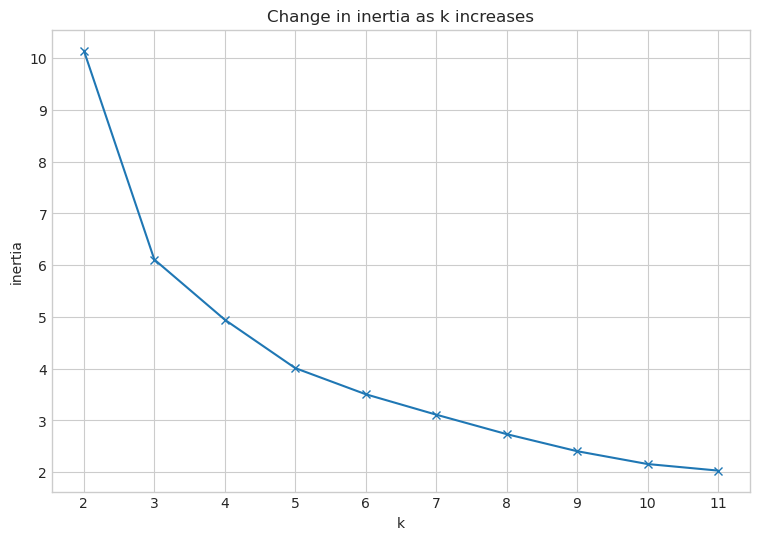

In [93]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

> # 3

### Loop Cluster Count

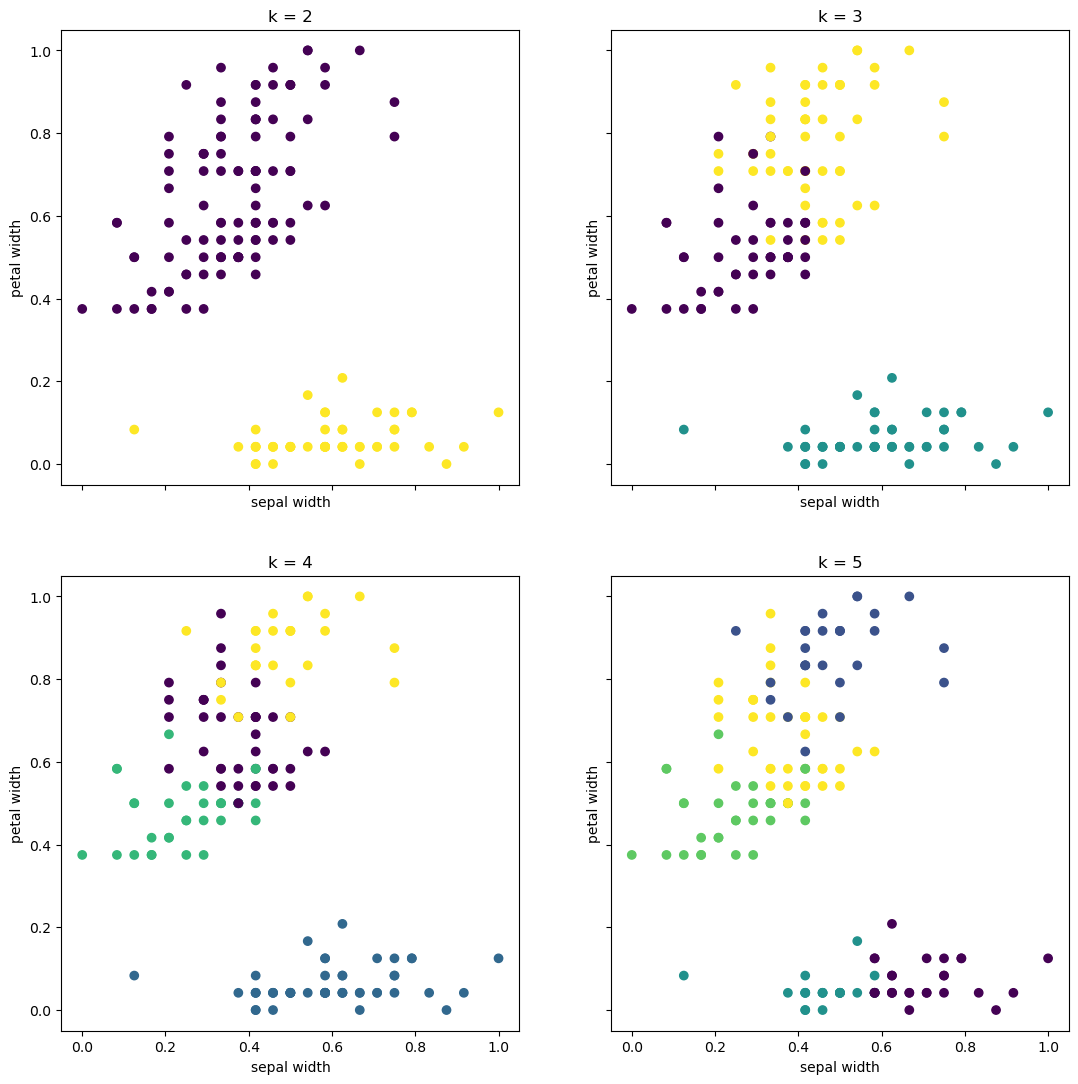

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X['sepal_width'], X['petal_width'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

### Clustering with the Mall Dataset

In [54]:
url = get_db_url('mall_customers')

query = '''
            SELECT *
            FROM customers
        '''

mall = pd.read_sql(query,url)

In [55]:
mall.columns

Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

### Feature Select

In [98]:
X = mall[['age', 'spending_score']]

In [99]:
mm_scaler = MinMaxScaler()

X[['age', 'spending_score']]= mm_scaler.fit_transform(X[['age', 'spending_score']])

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_31777/3486594731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age', 'spending_score']]= mm_scaler.fit_transform(X[['age', 'spending_score']])


In [100]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [102]:
mall['cluster'] = kmeans.predict(X)

b. Visualize the results of your clustering.

### Visualize Clusters

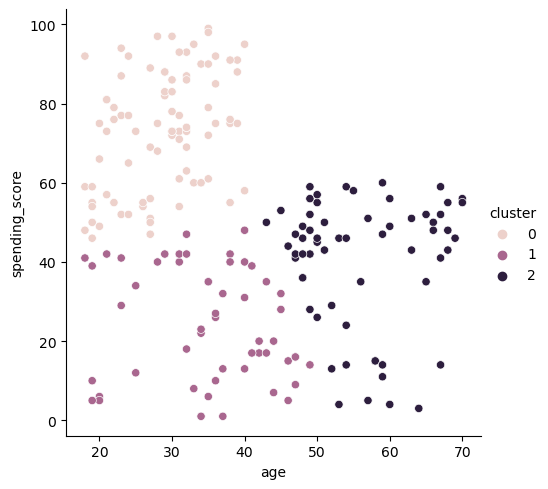

In [103]:
sns.relplot(data=mall,x='age',y='spending_score',hue='cluster')

### Cluster Centers

In [113]:
kmeans.cluster_centers_

array([[0.52767355, 0.1483325 ],
       [0.23347356, 0.80771684],
       [0.11791498, 0.41675618],
       [0.9029304 , 0.48104956],
       [0.56036325, 0.46371882]])

In [105]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


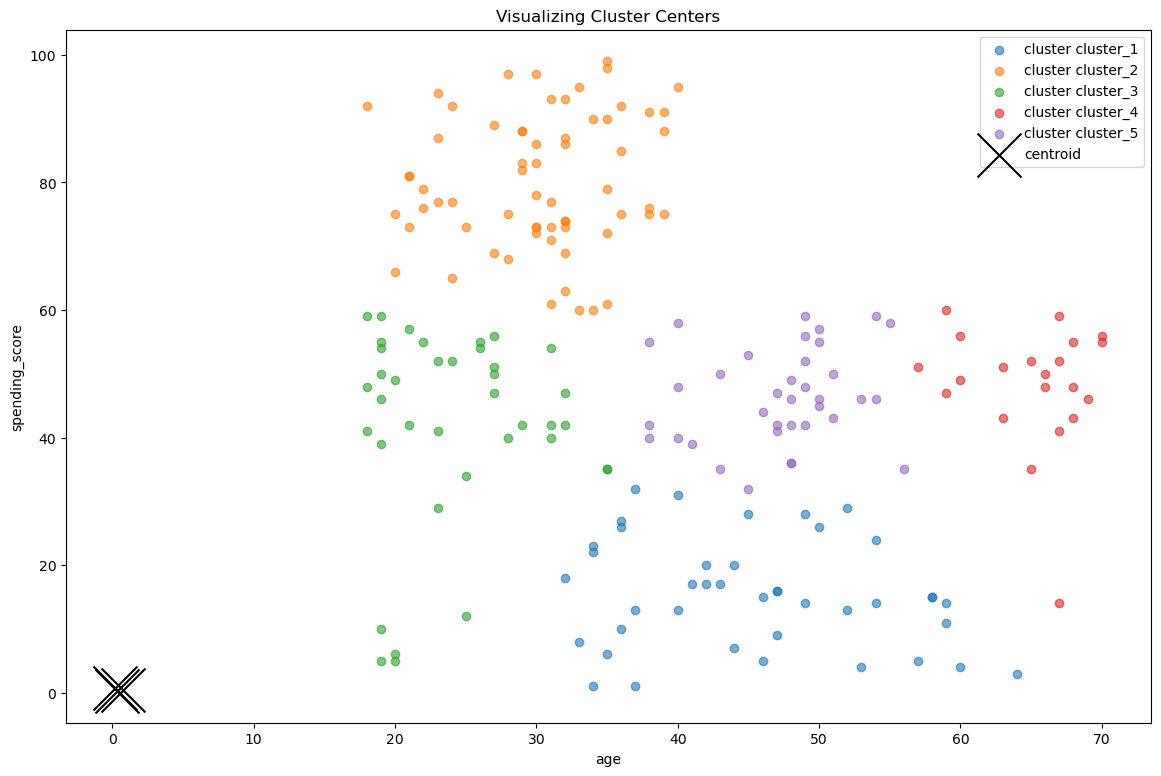

In [114]:
plt.figure(figsize=(14, 9))

for cluster, subset in mall.groupby('cluster'):
    plt.scatter(subset['age'], subset['spending_score'], label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(x='age',y='spending_score', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('spending_score')
plt.title('Visualizing Cluster Centers')
plt.show()

### Cluster Count = 5

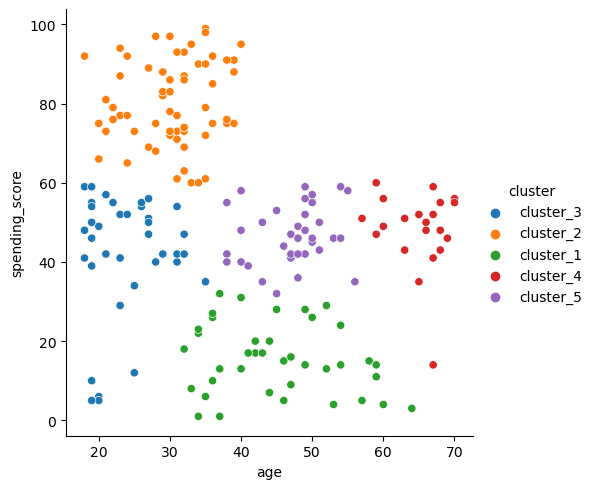

In [107]:
kmeans = KMeans(n_clusters=5).fit(X)
mall['cluster'] = kmeans.predict(X)
mall.cluster = 'cluster_' + (mall['cluster'] + 1).astype('str')
sns.relplot(data=mall,x='age',y='spending_score',hue='cluster')

c. Use the elbow method to visually select a good value for k.

### Elbow

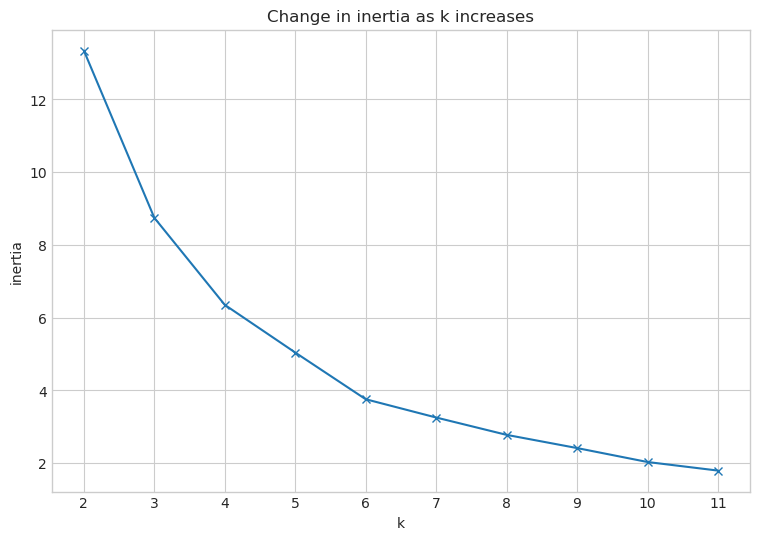

In [108]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

> # 4

### Loop Cluster Count

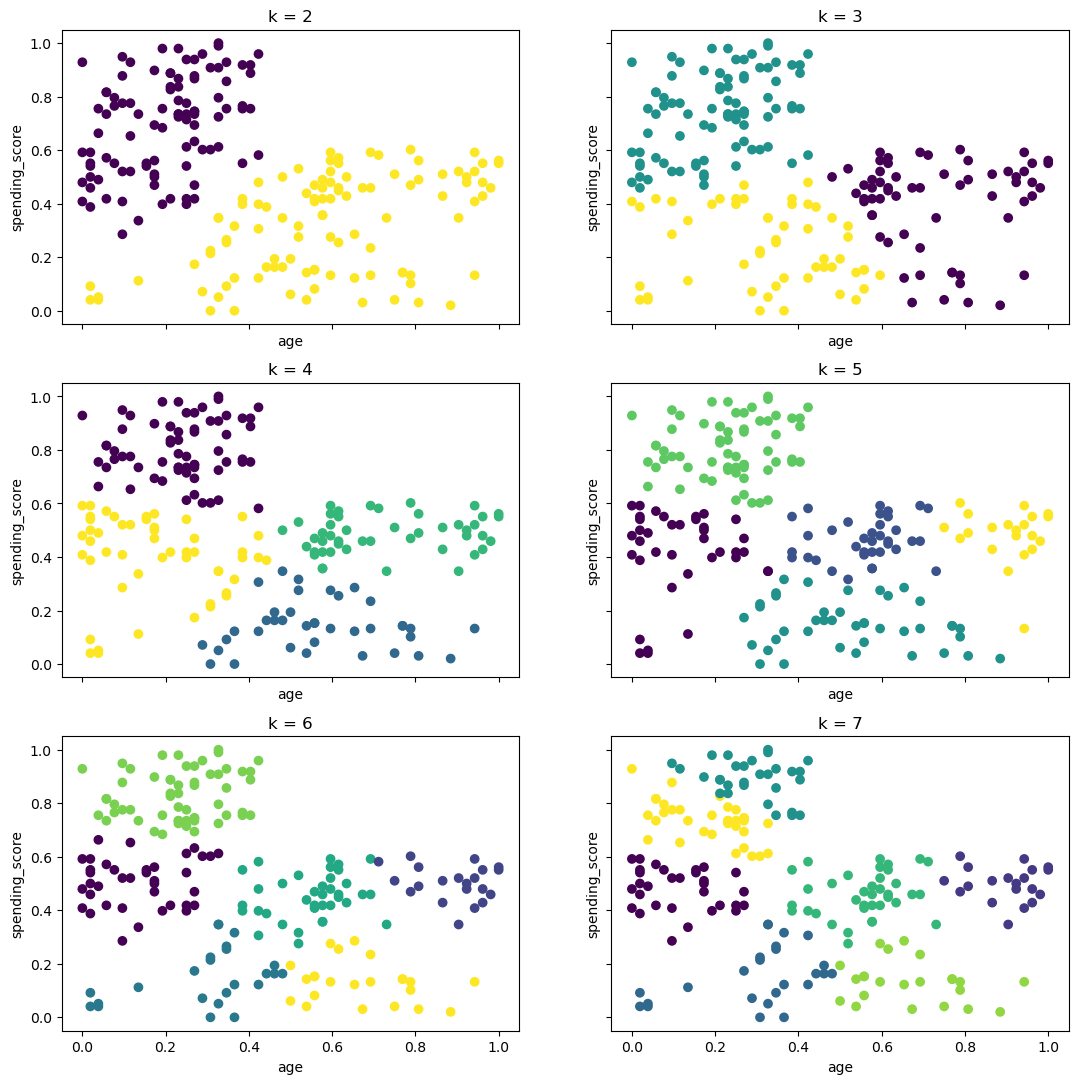

In [120]:
fig, axs = plt.subplots(3, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 8)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X['age'], X['spending_score'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending_score')